</hr>

# Approximating the Brachistochrone Curve with a Genetic Algorithm

Vivek Gopalakrishnan | June 9, 2018


**Problem setup:**

Find the least-time path between two points in 2-dimensional space. Assume friction is negligible and that all particles experience a uniform gravitational field.

**Theory:**

This project aims to numerically approximate the Brachistochrone, the path of least-time connecting two points. The path of least-time is defined as the path that, if followed by a particle, would take the least time to travel from one point to another. From classical proofs derived in the 1600s, we know know that this path is a cycloid, the curve obtained by tracing the path of a singular point on a wheel as the wheel rolls through space. Instead of using proof, I indend to find the least-time path using a genetic algorithm.

**Algorithm:**

1. Two points are randomly initialized and fixed in two-dimensional space. 
2. A population of random paths are generated. 
3. The times required to travel these paths are calculated (*time* is the genetic algorithm's fitness score). 
4. Paths with high fitness scores are more likely to be selected in the mating pool. The pool randomly combines different parent paths to create a new generation of paths.
5. Iterate through steps 3 and 4 until the fitnesses converge to a steady value.
6. Visualize these curves and compare to the theoretical values.

**References:**
- [Brachistochrone Curve](https://en.wikipedia.org/wiki/Brachistochrone_curve)
- [Genetic Algorithms](http://natureofcode.com/book/chapter-9-the-evolution-of-code/)

<hr>

### Step 0: Setup

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from noise import perlin
%matplotlib inline

### Step 1: Initialize the endpoints

In [98]:
def init_path():
    y = np.random.rand(1,2)
    p1 = (0, 0)
    p2 = (1, np.random.uniform(-1,0))
    
    return p1, p2

In [99]:
p1, p2 = init_path()
print(p1, p2)

(0, 0) (1, -0.2247104640349914)


### Step 2: Make a random path

To make the initial generation of paths more useful, some constraints are placed on the algorithm. Paths must:
1. Be bounded by the endpoints
2. Be differentiable

In [100]:
def generate_path(p1, p2):
    
    # Seperate x's and y's
    x = [p[0] for p in [p1,p2]]
    y = [p[1] for p in [p1,p2]]
    
    # Linearly interpolate the two points
    f = interp1d(x, y, kind='linear')
    
    # Make the domain
    x = np.linspace(0,1,26)
    y = []
    
    # Fill in the range
    for index, item in enumerate(x):
        
        # Bound the curve at the two points p1 and p2
        if (item == min(x)):
            y.append(p1[1])
        elif (item == max(x)):
            y.append(p2[1])
            
        # For every point excluding the boundary, add noise
        else:
            y.append(f(item) + np.random.uniform(-1,0))
    
    # Iterpolate the data (x, y) to create the path
    f2 = interp1d(x, y, kind='quadratic')
    
    return f2

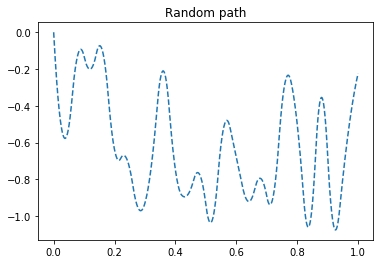

In [101]:
# Visualize the path
f2 = generate_path(p1, p2)
xnew = np.linspace(0,1,1001)
plt.plot(xnew, f2(xnew), '--')
plt.title("Random path")
plt.show()

### Step 3: Fitness function

The parameter we are trying to optimize time; therefore, a logical output for the fitness function would be the time it takes a particle to travel along the random path. To simplify the calculation for time, assume the particle travelling this path is a point mass, friction is negligble, and that the particle starts at rest.

The following derivation of the time $T$ required to travel that path is motivated from the simple observation 
$$ v = \frac{ds}{dt} \Leftrightarrow dt = \frac{ds}{v}$$


Because we are assuming a uniform gravitational field, the total energy of the system as a function of x is

$$E(x) = K + U_g = \frac{1}{2}mv(x)^2 + mgh(x) = \frac{1}{2}mv(x)^2 + mgf(x)$$


Additionally, because the particle starts at rest 
$$E(x=0)=0$$

Combining these equations, we see
$$\frac{1}{2}mv(x)^2 + mgf(x) = 0$$

$$v(x)^2 = -2gf(x)$$

$$v(x) \propto \sqrt{-f(x)}$$


To find the total displacement along the curve ($ds$) for a differential movement in the x direction ($dx$), we can use the arc length formula:
$$ds = dx \sqrt{1 + f'(x))}$$

Then, the time to move $ds$ along $f(x)$ is given by $dt = \frac{ds}{v(x)}$. Thus,
$$T = \int{dt} = \int_{0}^{x_n} \frac{ds}{v(x)} = \int_{0}^{x_n} \sqrt{\frac{1 + f'(x)}{-f(x)}}dx$$